In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rcParams

# Task 1.0

In [69]:
z = np.random.choice([0,1,2],10000)

def loop_function(x):
    '''
    The idea of this function is have a variable "count" which will sum 1 every time we find the subsequence
    while reading the values on our input x.
    '''
    
    count = 0 
    for i in range(len(x)-2): 
        if x[i] == 2 and x[i+1] == 0 and x[i+2] == 1: 
            count += 1 
            
    return count

def vectorized_function(x):
    '''
    On the vectorized version of the solution, we remember that numpy.logical_and operates entry-wise, so taking our 
    input array x, we create two sub-arrays x1 and x2 such that they begin on the entries 1 and 2 of x respectively,
    remembering python start to count entries from 0. In order for x1 and x2 to have the same length as x,
    we add some -1 values at the end; we choose this values because they do not appear on the original sequence, so
    there is no chance this would create an artificial subsequence.
    
    Then we look for the entries in which x is equal to 2, x1 to 0 and x2 to 1 and use np.logical_and
    to look for the entries in which the three equations are true, being those the cases in which we have our
    searched subsequence. 
    
    Since python takes True as 1, summing the resulting vector is the same to count how many True values it has.
    '''
    x1,x2 = np.append(x[1:],-1),np.concatenate((x[2:],[-1,-1]))
    r = np.logical_and(x == 2,x1 == 0)
    r = np.logical_and(r,x2 == 1)
    return np.sum(r)

# Task 1.1

## a)

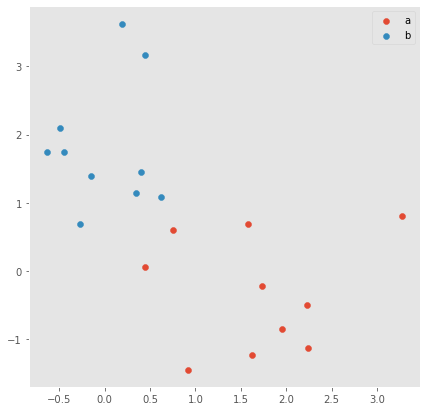

In [70]:
style.use('ggplot')
rcParams['figure.figsize'] = (7.0, 7.0)

# Generating random variables with normal distributions
a = np.random.multivariate_normal([3/2,0],np.eye(2),10)
b = np.random.multivariate_normal([0,3/2],np.eye(2),10)

#Plotting the values
plt.scatter(a[...,0],a[...,1],label = 'a')
plt.scatter(b[...,0],b[...,1],label = 'b')
plt.legend()
plt.grid(False)
plt.show()

## b)

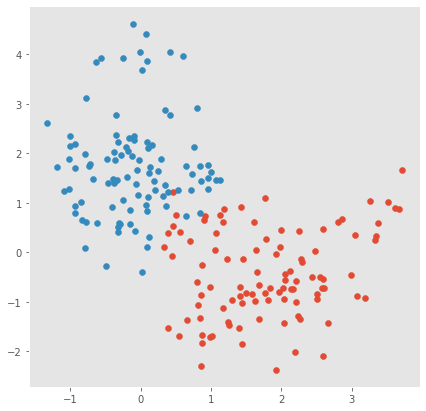

In [71]:
points = 100 #Number of points in the graph

#Generating white noise and choosing index
epsilon_a = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_a = np.random.choice(np.arange(0,9,1),points)

epsilon_b = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_b = np.random.choice(np.arange(0,9,1),points)

#Generating our synthetic data
x = np.concatenate((a[index_a] + epsilon_a,b[index_b] + epsilon_b),axis=0)

#Plotting
plt.scatter(x[:points][...,0],x[:points][...,1])
plt.scatter(x[points:][...,0],x[points:][...,1])
plt.grid(False)
plt.show()

## c)

In [72]:
y = np.concatenate((np.zeros(points),np.ones(points)))

# Task 1.2

In [73]:
'''
We solve the LLS obtaining our parameters which produce the best fit. For this, x_mod is the "modified" data
'''
x_mod = np.concatenate((np.expand_dims(np.ones(len(x)),-1),x),axis=1)

A,B = np.dot(np.transpose(x_mod),x_mod),np.dot(np.transpose(x_mod),y)
alpha = np.dot(np.linalg.inv(A),B)


'''
We produce a mesh and use alpha to distinguish which points of it will correspond to which class.
This part is just for plotting reasons.
'''

xx2, yy2 = np.meshgrid(np.arange(min(x[...,0])-1, max(x[...,0])+1, .01),
                     np.arange(min(x[...,1])-1, max(x[...,1])+1, .01))

mesh = np.c_[xx2.ravel(), yy2.ravel()]
mesh = np.concatenate((np.expand_dims(np.ones(len(mesh)),-1),mesh),axis=1)
mesh = np.array(np.sum(np.multiply(mesh,alpha),axis=1)<0.5,dtype ='int')
mesh = mesh.reshape(xx2.shape)

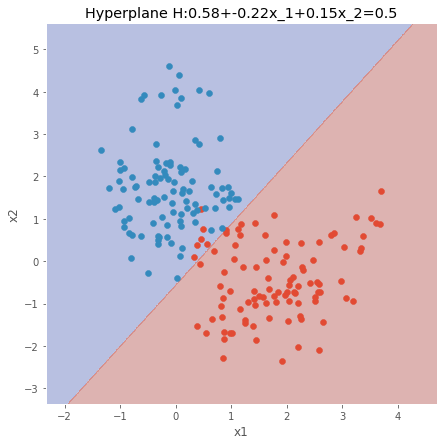

In [74]:
'''
Produce the requested plot showing the data points and the classification made by the LLS algorithm
'''

alp = np.trunc(100*alpha)/100

plt.contourf(xx2, yy2, mesh, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[:points][...,0],x[:points][...,1])
plt.scatter(x[points:][...,0],x[points:][...,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hyperplane H:' + str(alp[0]) +'+'+ str(alp[1]) +'x_1+'+str(alp[2]) +'x_2=0.5')
plt.grid(False)
plt.show()

# Task 1.3

In [75]:
'''
Using the hypyerplane to classify the data we had and compute the confusion matrix
'''

classified = np.array(np.sum(np.multiply(x_mod,alpha),axis=1)>0.5,dtype ='int')
C = np.zeros((2,2))

for i in range(2):
    for j in range(2):
        C[i,j] = np.sum(np.logical_and(classified == i,y==j))
        
accuracy = np.trace(C)/np.sum(C)
print(accuracy)

0.97


# Task 1.4

In [76]:
'''
We generate test data as in 1.1. Then we classify the new data set.
The accuracy for the test data is very close to that of the training data set

'''

points = 10000 

epsilon_a = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_a = np.random.choice(np.arange(0,9,1),points)
epsilon_b = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_b = np.random.choice(np.arange(0,9,1),points)

x_test = np.concatenate((a[index_a] + epsilon_a,b[index_b] + epsilon_b),axis=0)
y_test = np.concatenate((np.zeros(points),np.ones(points)))

x_mod_test = np.concatenate((np.expand_dims(np.ones(len(x_test)),-1),x_test),axis=1)
classified_test = np.array(np.sum(np.multiply(x_mod_test,alpha),axis=1)>0.5,dtype ='int')

C_test = np.zeros((2,2))

for i in range(2):
    for j in range(2):
        C_test[i,j] = np.sum(np.logical_and(classified_test == i,y_test==j))
        
accuracy_test = np.trace(C_test)/np.sum(C_test)
print(accuracy_test)

0.91435


We can notice the obtained accuracy from the exercise 1.3 is better than in this case.

# Taks 1.5

In [77]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data '
irisDataFrame = pd.read_csv(url)
irisDataFrame

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


## a)

In [78]:
'''
Creating a new column with the labels
'''

irisDataFrame['class'] = np.array(np.array(irisDataFrame['Iris-setosa']) != 'Iris-setosa',dtype = 'int') 

irisDataFrame

,5.1,3.5,1.4,0.2,Iris-setosa,class
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica,1
145,6.3,2.5,5.0,1.9,Iris-virginica,1
146,6.5,3.0,5.2,2.0,Iris-virginica,1
147,6.2,3.4,5.4,2.3,Iris-virginica,1


### a.1)

In [79]:
'''
Reusing code from before
'''

x = np.array(np.array(irisDataFrame)[...,:2],dtype='float')
x_mod = np.concatenate((np.expand_dims(np.ones(len(x)),-1),x),axis=1)
y =np.array(irisDataFrame['class'])

A,B = np.dot(np.transpose(x_mod),x_mod),np.dot(np.transpose(x_mod),y)
alpha = np.dot(np.linalg.inv(A),B)


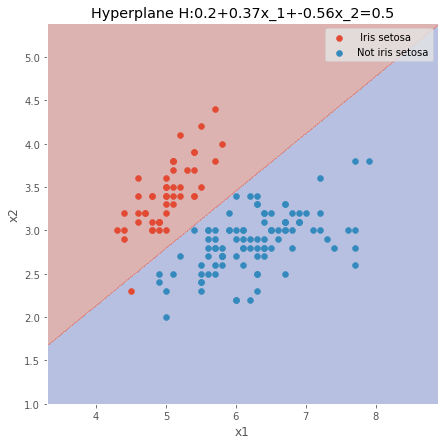

In [80]:
xx2, yy2 = np.meshgrid(np.arange(min(x[...,0])-1, max(x[...,0])+1, .01),
                     np.arange(min(x[...,1])-1, max(x[...,1])+1, .01))

mesh = np.c_[xx2.ravel(), yy2.ravel()]
mesh = np.concatenate((np.expand_dims(np.ones(len(mesh)),-1),mesh),axis=1)
mesh = np.array(np.sum(np.multiply(mesh,alpha),axis=1)<0.5,dtype ='int')
mesh = mesh.reshape(xx2.shape)

alp = np.trunc(100*alpha)/100

plt.contourf(xx2, yy2, mesh, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[y==0][...,0],x[y==0][...,1],label = ' Iris setosa')
plt.scatter(x[y==1][...,0],x[y==1][...,1],label = 'Not iris setosa')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hyperplane H:' + str(alp[0]) +'+'+ str(alp[1]) +'x_1+'+str(alp[2]) +'x_2=0.5')
plt.grid(False)
plt.show()

### a.2)

In [81]:
'''
Computing accuracy using all the information available.
Analogous computations as before.
'''

x_full = np.array(np.array(irisDataFrame)[...,:-2],dtype='float')
x_mod_full = np.concatenate((np.expand_dims(np.ones(len(x_full)),-1),x_full),axis=1)
y =np.array(irisDataFrame['class'])

A,B = np.dot(np.transpose(x_mod_full),x_mod_full),np.dot(np.transpose(x_mod_full),y)
alpha_full = np.dot(np.linalg.inv(A),B)

classified = np.array(np.sum(np.multiply(x_mod_full,alpha_full),axis=1)>0.5,dtype ='int')
C = np.zeros((2,2))

for i in range(2):
    for j in range(2):
        C[i,j] = np.sum(np.logical_and(classified == i,y==j))
        
accuracy = np.trace(C)/np.sum(C)
print(accuracy)

1.0


## b)

In [82]:
irisDataFrame['class'] = np.array(np.array(irisDataFrame['Iris-setosa']) != 'Iris-versicolor',dtype = 'int') 

irisDataFrame

,5.1,3.5,1.4,0.2,Iris-setosa,class
0,4.9,3.0,1.4,0.2,Iris-setosa,1
1,4.7,3.2,1.3,0.2,Iris-setosa,1
2,4.6,3.1,1.5,0.2,Iris-setosa,1
3,5.0,3.6,1.4,0.2,Iris-setosa,1
4,5.4,3.9,1.7,0.4,Iris-setosa,1
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica,1
145,6.3,2.5,5.0,1.9,Iris-virginica,1
146,6.5,3.0,5.2,2.0,Iris-virginica,1
147,6.2,3.4,5.4,2.3,Iris-virginica,1


### b.1)

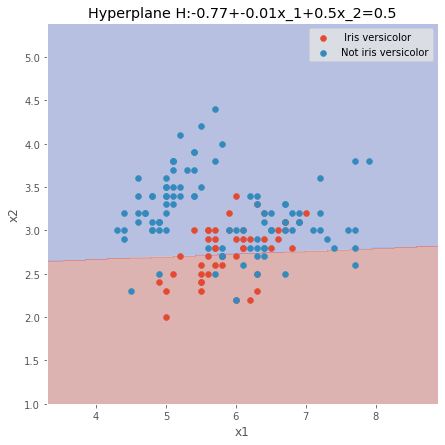

In [83]:
'''
Using hyperplanes to classify Iris versicolor.
'''

x = np.array(np.array(irisDataFrame)[...,:2],dtype='float')
x_mod = np.concatenate((np.expand_dims(np.ones(len(x)),-1),x),axis=1)
y =np.array(irisDataFrame['class'])

A,B = np.dot(np.transpose(x_mod),x_mod),np.dot(np.transpose(x_mod),y)
alpha = np.dot(np.linalg.inv(A),B)

xx2, yy2 = np.meshgrid(np.arange(min(x[...,0])-1, max(x[...,0])+1, .01),
                     np.arange(min(x[...,1])-1, max(x[...,1])+1, .01))

mesh = np.c_[xx2.ravel(), yy2.ravel()]
mesh = np.concatenate((np.expand_dims(np.ones(len(mesh)),-1),mesh),axis=1)
mesh = np.array(np.sum(np.multiply(mesh,alpha),axis=1)<0.5,dtype ='int')
mesh = mesh.reshape(xx2.shape)

alp = np.trunc(100*alpha)/100

plt.contourf(xx2, yy2, mesh, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[y==0][...,0],x[y==0][...,1],label = ' Iris versicolor')
plt.scatter(x[y==1][...,0],x[y==1][...,1],label = 'Not iris versicolor')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hyperplane H:' + str(alp[0]) +'+'+ str(alp[1]) +'x_1+'+str(alp[2]) +'x_2=0.5')
plt.grid(False)
plt.show()

### b.2)

In [84]:
'''
Computing accuracy for classification of Iris versicolor using all the information we have.
'''

x_full = np.array(np.array(irisDataFrame)[...,:-2],dtype='float')
x_mod_full = np.concatenate((np.expand_dims(np.ones(len(x_full)),-1),x_full),axis=1)
y =np.array(irisDataFrame['class'])

A,B = np.dot(np.transpose(x_mod_full),x_mod_full),np.dot(np.transpose(x_mod_full),y)
alpha_full = np.dot(np.linalg.inv(A),B)

classified = np.array(np.sum(np.multiply(x_mod_full,alpha_full),axis=1)>0.5,dtype ='int')
C = np.zeros((2,2))

for i in range(2):
    for j in range(2):
        C[i,j] = np.sum(np.logical_and(classified == i,y==j))
        
accuracy = np.trace(C)/np.sum(C)
print(accuracy)

0.738255033557047


We can see that in the second case the LLS method doesn't perfom well. The accuracy is significantly worse than in the first example.

# Task 1.6

In [85]:
'''
Defining gradient and loss function
'''

def grad(alpha,x,y):
    return 2*np.sum(np.multiply(np.dot(alpha,np.transpose(x))-y,np.transpose(x)),axis=1)/len(y)

def J(alpha,x,y):
    return np.sum(np.power(np.dot(alpha,np.transpose(x))-y,2))/len(y)

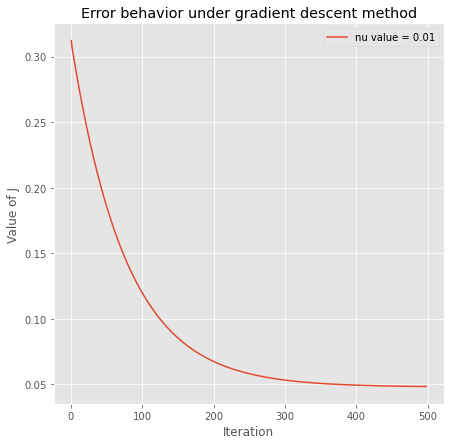

In [86]:
'''
First we look at different values nu can take from the list given on the description of the task and we stopped
trying out values when we found one for which the gradient descent did not converged.

Then, we used the value of nu we found to plot the evolution of the error function against the number of iteration.
'''

irisDataFrame = pd.read_csv(url)
irisDataFrame['class'] = np.array(np.array(irisDataFrame['Iris-setosa']) != 'Iris-setosa',dtype = 'int') 
x = np.array(np.array(irisDataFrame)[...,:2],dtype='float')
x_mod = np.concatenate((np.expand_dims(np.ones(len(x)),-1),x),axis=1)
y =np.array(irisDataFrame['class'])

A,B = np.dot(np.transpose(x_mod),x_mod),np.dot(np.transpose(x_mod),y)
alpha = np.dot(np.linalg.inv(A),B)


max_step = 100000
converged = 1.01*J(alpha,x_mod,y)
options = 0.1**(np.arange(0,4,1)[::-1])
nu_good = 1e-16

for ind,nu in enumerate(options):

    dx = 2*converged
    step = 0
    alpha_grad = 0.5*np.ones(len(x_mod[0]))

    while (dx > converged) and (step < max_step):   
        
        if dx > 1e10:
            break
            
        alpha_grad = alpha_grad - nu*grad(alpha_grad,x_mod,y)
        dx = J(alpha_grad,x_mod,y)
        step += 1
    
    if dx > converged:
        break
    else:
        nu_good = nu
        
        
nu = int(nu_good*1e5)/1e5
error = []
dx = 2*converged
step = 0
alpha_grad = 0.5*np.ones(len(x_mod[0]))

while (dx > converged) and (step < max_step):   

    alpha_grad = alpha_grad - nu*grad(alpha_grad,x_mod,y)
    dx = J(alpha_grad,x_mod,y)
    error.append(dx)
    step += 1
    
plt.plot(np.arange(1,len(error),1),error[1:],label = "nu value = "+ str(nu))
plt.title("Error behavior under gradient descent method")
plt.xlabel("Iteration")
plt.ylabel("Value of J")
plt.legend()
plt.show()

We can notice among first 300 iterations of the algorithm the error (value of J) decreases significantly. However, in the later iterations the error reduction is not really observable and the J even stabilizes. 

# Task 1.7

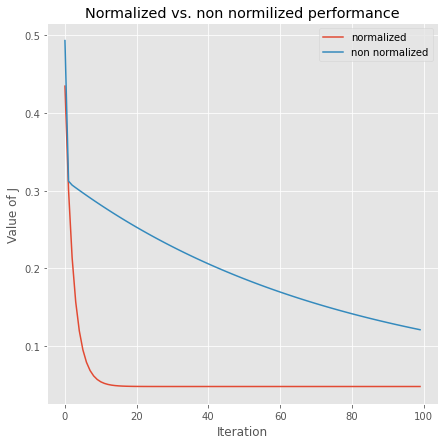

In [87]:
'''
Same procedure as in task 1.6, but applied to normalized data and with a plot to compare thir first 100 iterations
at the end.
'''

irisDataFrame = pd.read_csv(url)
irisDataFrame['class'] = np.array(np.array(irisDataFrame['Iris-setosa']) != 'Iris-setosa',dtype = 'int') 
x = np.array(np.array(irisDataFrame)[...,:2],dtype='float')
y =np.array(irisDataFrame['class'])

x = (x - np.mean(x,axis=0))/np.std(x,axis=0)
x_norm = np.concatenate((np.expand_dims(np.ones(len(x)),-1),x),axis=1)

max_step = 100000
converged = 1.01*J(alpha,x_mod,y)
options = 0.1**(np.arange(0,4,1)[::-1])
nu_good = 1e-16

for ind,nu in enumerate(options):

    dx = 2*converged
    step = 0
    alpha_grad = 0.5*np.ones(len(x_mod[0]))

    while (dx > converged) and (step < max_step):   
        
        if dx > 1e10:
            break
            
        alpha_grad = alpha_grad - nu*grad(alpha_grad,x_norm,y)
        dx = J(alpha_grad,x_norm,y)
        step += 1

    if dx > converged:
        break
    else:
        nu_good = nu
        
        
nu = int(nu_good*1e5)/1e5
error_norm = []
max_step = 100
step = 0
alpha_grad = 0.5*np.ones(len(x_mod[0]))
  
for it in range(100):

    alpha_grad = alpha_grad - nu*grad(alpha_grad,x_norm,y)
    dx = J(alpha_grad,x_norm,y)
    error_norm.append(dx)
    step += 1
    
plt.plot(np.arange(0,len(error_norm),1),error_norm,label = "normalized")
plt.plot(np.arange(0,100,1),error[:100],label = "non normalized")
plt.title("Normalized vs. non normilized performance")
plt.xlabel("Iteration")
plt.ylabel("Value of J")
plt.legend()
plt.show()

We can observe that in the normalized case the loss function curve decreases and stabilizes way more faster. It takes it about 10 iterations to get to the stabilization level. 

# Task 1.8

In [88]:
from scipy.spatial.distance import cdist

In [89]:
'''
Generation of the random data.
'''

a = np.random.multivariate_normal([3/2,0],np.eye(2),10)
b = np.random.multivariate_normal([0,3/2],np.eye(2),10)

points = 100
epsilon_a = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_a = np.random.choice(np.arange(0,9,1),points)

epsilon_b = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_b = np.random.choice(np.arange(0,9,1),points)

x = np.concatenate((a[index_a] + epsilon_a,b[index_b] + epsilon_b),axis=0)
y = np.concatenate((np.zeros(points),np.ones(points)))

In [90]:
'''
Computation of the accuracy of knn for different values of k.
'''

for k in [1,15,30]:

    dists = cdist(x,x)
    idx = np.argpartition(dists, k, axis=0)[:k]
    nearest_dists = np.take(y, idx)
    classified = 1*((np.sum(nearest_dists,axis=0)/k) > 0.5)

    C = np.zeros((2,2))
    
    for i in range(2):
        for j in range(2):
            C[i,j] = np.sum(np.logical_and(classified == i,y==j))

    print("accuracy of knn using k = ",k,":",np.trace(C)/np.sum(C))

accuracy of knn using k =  1 : 1.0
accuracy of knn using k =  15 : 0.95
accuracy of knn using k =  30 : 0.955


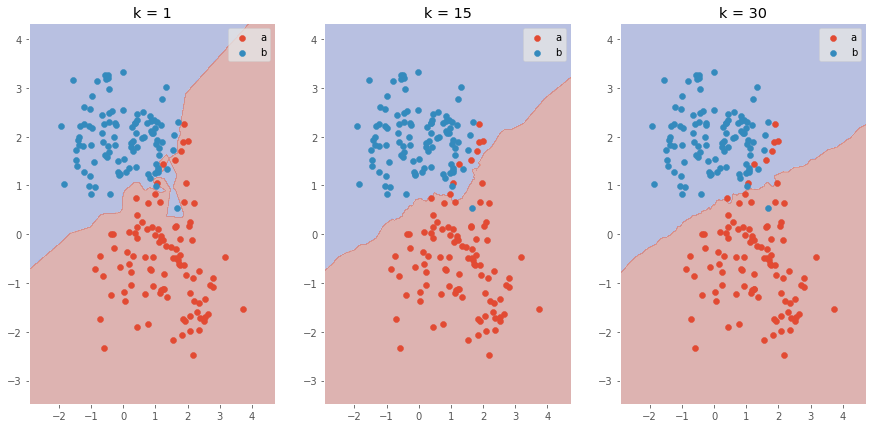

In [91]:
'''
Plot for the separation levels for different values of k
'''

fig,axs = plt.subplots(nrows=1, ncols=3,figsize=(15,7))
ks = [1,15,30]
xx2, yy2 = np.meshgrid(np.arange(min(x[...,0])-1, max(x[...,0])+1, .01),
                     np.arange(min(x[...,1])-1, max(x[...,1])+1, .01))

for entry in range(len(ks)):
    k = ks[entry]

    mesh = np.c_[xx2.ravel(), yy2.ravel()]

    dists = cdist(x,mesh)
    idx = np.argpartition(dists, k, axis=0)[:k]
    nearest_dists = np.take(y, idx)
    mesh = 1*((np.sum(nearest_dists,axis=0)/k) < 0.5)
    mesh = mesh.reshape(xx2.shape)
    
    axs[entry].contourf(xx2, yy2, mesh, cmap=plt.cm.coolwarm, alpha=0.3)
    axs[entry].scatter(x[...,0][:points],x[...,1][:points],label = "a")
    axs[entry].scatter(x[...,0][points:],x[...,1][points:],label = "b")
    axs[entry].legend()
    axs[entry].set_title("k = " + str(k))
    axs[entry].grid(False)

plt.show()

# Task 1.9

## a)

In [92]:
'''
Using the knn algorithm taking the traning data equal to the test data. 
'''

a = np.random.multivariate_normal([3/2,0],np.eye(2),10)
b = np.random.multivariate_normal([0,3/2],np.eye(2),10)

points = 100
epsilon_a = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_a = np.random.choice(np.arange(0,9,1),points)

epsilon_b = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_b = np.random.choice(np.arange(0,9,1),points)

x = np.concatenate((a[index_a] + epsilon_a,b[index_b] + epsilon_b),axis=0)
y = np.concatenate((np.zeros(points),np.ones(points)))
accuracy_self = []

for k in np.arange(1,201,1):

    dists = cdist(x,x)
    idx = np.argpartition(dists, min(len(dists)-1,k), axis=0)[:min(len(dists)-1,k)]
    nearest_dists = np.take(y, idx)
    classified = 1*((np.sum(nearest_dists,axis=0)/k) > 0.5)

    C = np.zeros((2,2))

    for i in range(2):
        for j in range(2):
            C[i,j] = np.sum(np.logical_and(classified == i,y==j))

    accuracy_self.append(np.trace(C)/np.sum(C))

## b)

In [93]:
'''
Applying knn algorithm taking test data different from training data.
'''

points = 10000 

epsilon_a = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_a = np.random.choice(np.arange(0,9,1),points)
epsilon_b = np.random.multivariate_normal([0,0],np.eye(2)/4,points)
index_b = np.random.choice(np.arange(0,9,1),points)

x_test = np.concatenate((a[index_a] + epsilon_a,b[index_b] + epsilon_b),axis=0)
y_test = np.concatenate((np.zeros(points),np.ones(points)))

accuracy_test = []

for k in np.arange(1,201,1):

    dists = cdist(x,x_test)
    idx = np.argpartition(dists, min(len(dists)-1,k), axis=0)[:min(len(dists)-1,k)]
    nearest_dists = np.take(y, idx)
    classified = 1*((np.sum(nearest_dists,axis=0)/k) > 0.5)

    C = np.zeros((2,2))

    for i in range(2):
        for j in range(2):
            C[i,j] = np.sum(np.logical_and(classified == i,y_test==j))

    accuracy_test.append(np.trace(C)/np.sum(C))


## c)

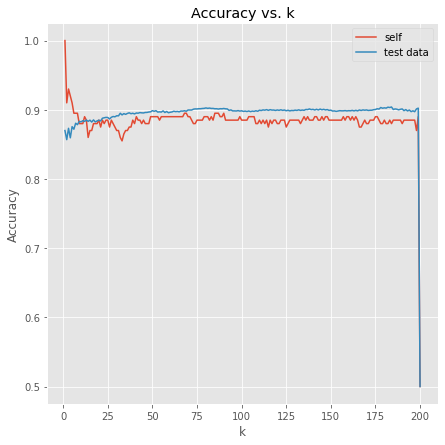

In [94]:
'''
Plotting the accuracies changing the test data.
'''

plt.plot(np.arange(1,201,1),accuracy_self,label="self")
plt.plot(np.arange(1,201,1),accuracy_test,label="test data")
plt.title("Accuracy vs. k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can notice that for increasing k the accuracy of the training data decreases to a certain level rapidly and then varies with a small tendence to decrease. For the accuracy of test data we can observe long time stabilization and then sudden, enormous fall of it.